In [2]:
import numpy as np
import pandas as pd

sectors_data = {}
excel_file_path = 'logreturns_2000_2020_data_by_sector.xlsx'
snp_price_data = pd.ExcelFile(excel_file_path)
for sheet_name in snp_price_data.sheet_names:
    sheet_data = pd.read_excel(excel_file_path, sheet_name=sheet_name)
    sheet_data['Date'] = pd.to_datetime(sheet_data['Unnamed: 0'], format='%Y-%m-%d')
    sheet_data.set_index('Date', inplace=True)
    sheet_data.drop(columns='Unnamed: 0', inplace=True)
    sectors_data[sheet_name] = sheet_data

# 데이터프레임 생성
df = pd.DataFrame()
for sector, data in sectors_data.items():
    data.columns = [f"{sector}_{col}" for col in data.columns]
    if df.empty:
        df = data
    else:
        df = df.join(data, how='outer')

df = df[1:]

In [3]:
df

,Tele_VZ,Tele_DIS,Tele_T,Tele_CMCSA,Tele_EA,COND_AMZN,COND_HD,COND_MCD,COND_NKE,COND_SBUX,...,UTIL_NEE,UTIL_DUK,UTIL_D,UTIL_SO,UTIL_EXC,REES_AMT,REES_SPG,REES_CCI,REES_PLD,REES_PSA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.032859,0.056926,-0.060292,-0.077817,-0.122898,-0.086884,-0.054174,-0.020718,-0.056089,-0.032198,...,0.018019,0.015424,0.024293,0.010929,-0.007407,-0.010718,-0.011111,-0.001024,-0.015899,0.000000
2000-01-05,0.032859,0.040664,0.015417,-0.026356,-0.000700,-0.161039,0.020041,0.015975,0.056089,0.013004,...,0.032214,0.040005,0.026837,0.050342,0.047196,0.029726,0.008345,-0.014448,-0.012903,0.008208
2000-01-06,-0.011537,-0.040664,-0.026781,0.037850,-0.110115,-0.061914,-0.048790,-0.014366,-0.005208,0.035537,...,0.000000,0.026604,0.010844,0.002581,0.001771,-0.010515,0.024625,-0.035983,0.019293,0.037438
2000-01-07,-0.007411,-0.015937,0.008535,-0.031933,0.029255,0.059222,0.056695,0.025398,0.000000,-0.005000,...,0.028411,0.025914,0.000000,0.017880,0.000000,0.053511,0.042334,0.050431,0.018928,0.013038
2000-01-10,-0.005328,0.142029,0.014065,0.120729,0.154367,-0.005405,-0.004933,0.004691,0.016829,0.041724,...,-0.008439,-0.001164,0.000000,-0.007624,0.058436,0.084503,0.010309,0.046054,0.006231,0.020514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,-0.000509,0.018024,0.012249,0.000400,0.014808,-0.006649,-0.000852,0.000472,-0.004856,-0.003424,...,-0.005099,-0.005488,0.007320,-0.005710,-0.001198,-0.014113,-0.000836,-0.006733,-0.015064,-0.022606
2020-12-24,-0.002037,0.001037,-0.002089,0.006772,0.002118,-0.003957,0.004106,-0.002976,-0.001129,-0.000490,...,0.008707,0.007051,0.002563,0.007048,0.002873,0.005733,0.008570,0.010050,0.010857,0.008117
2020-12-28,0.002377,0.029101,-0.004892,0.014386,-0.007716,0.034470,-0.006183,0.012365,0.005844,0.022584,...,0.006779,0.006447,-0.007166,0.003172,0.009043,0.011007,0.013071,0.014505,0.010028,0.001266


In [4]:
#스케일링을 위한 학습데이터와 테스트데이터 셋 분리
train_scaling_size = int(len(df) * 0.7)
t_train_X = df[0 : train_scaling_size]

# 전체 데이터 중 최소값과 최대값 구하기
tot_train_min = np.minimum.reduce([t_train_X.min(axis=0)])
tot_train_max = np.maximum.reduce([t_train_X.max(axis=0)])

# 각 주식의 범위를 계산
train_range = tot_train_max - tot_train_min

In [8]:
# 스케일링
test_data = (df - tot_train_min) / (train_range + 1e-7)

In [14]:
test_data

,Tele_VZ,Tele_DIS,Tele_T,Tele_CMCSA,Tele_EA,COND_AMZN,COND_HD,COND_MCD,COND_NKE,COND_SBUX,...,UTIL_NEE,UTIL_DUK,UTIL_D,UTIL_SO,UTIL_EXC,REES_AMT,REES_SPG,REES_CCI,REES_PLD,REES_PSA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,0.354953,0.740066,0.262338,0.209274,0.190265,0.340394,0.605034,0.513177,0.464856,0.460388,...,0.559630,0.568236,0.680395,0.514041,0.415479,0.580455,0.472130,0.642660,0.577928,0.528106
2000-01-05,0.605170,0.693744,0.526865,0.346221,0.505590,0.212705,0.762808,0.674886,0.781445,0.581785,...,0.615192,0.647229,0.691138,0.717734,0.607597,0.635484,0.515453,0.625072,0.582990,0.549079
2000-01-06,0.436137,0.462086,0.379426,0.517083,0.223251,0.383392,0.616479,0.541172,0.608451,0.642299,...,0.489104,0.604162,0.623599,0.470895,0.447774,0.580731,0.551704,0.596856,0.637412,0.623765
2000-01-07,0.451843,0.532521,0.502818,0.331379,0.582886,0.591976,0.840732,0.716417,0.623150,0.533433,...,0.600308,0.601947,0.577801,0.549967,0.441541,0.667846,0.591137,0.710079,0.636795,0.561420
2000-01-10,0.459777,0.982479,0.522140,0.737636,0.905729,0.480694,0.709715,0.625158,0.670645,0.658915,...,0.456073,0.514930,0.577801,0.418155,0.647145,0.710015,0.519827,0.704345,0.615333,0.580521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,0.478125,0.629255,0.515794,0.417422,0.545605,0.478552,0.718392,0.606563,0.609447,0.537667,...,0.469145,0.501033,0.608715,0.428050,0.437326,0.575836,0.495009,0.635180,0.579338,0.470344
2020-12-24,0.472305,0.580868,0.465698,0.434378,0.512860,0.483187,0.728931,0.591369,0.619963,0.545545,...,0.523183,0.541326,0.588625,0.493984,0.451649,0.602840,0.515955,0.657171,0.623152,0.548845
2020-12-28,0.489110,0.660808,0.455906,0.454641,0.487484,0.549356,0.707058,0.658976,0.639644,0.607513,...,0.515637,0.539388,0.547538,0.473952,0.473360,0.610015,0.525975,0.663007,0.621751,0.531342


In [18]:
test_data_unscailing = test_data * (train_range + 1e-7) + tot_train_min

In [20]:
import matplotlib.pyplot as plt

stocks = {
        'Tele' : ['VZ', 'DIS', 'T', 'CMCSA', 'EA'],
        'COND' : ['AMZN', 'HD', 'MCD', 'NKE', 'SBUX'],
        'ENRG': ['XOM', 'CVX', 'COP', 'EOG', 'SLB'],
        'HLCA' : ['JNJ', 'PFE', 'UNH','MRK','ABT'],
        'INDS' : ['BA', 'MMM','UNP','HON','RTX'],
        'MTRS': ['PPG', 'APD', 'ECL', 'SHW', 'NEM'],
        'FINC' : ['JPM', 'BRK-B', 'BAC', 'WFC', 'C'],
        'CONS' : ['PG', 'KO', 'PEP','WMT','MO'],
        'INFT' : ['AAPL','MSFT','INTC','CSCO','ORCL'],
        'UTIL' : ['NEE','DUK','D','SO','EXC'],
        'REES' : ['AMT', 'SPG', 'CCI', 'PLD', 'PSA']
    }



# 각 주식에 대한 그래프 그리기 위해 회사 리스트 생성
company_list = []
for sector in stocks:
    company_list += stocks[sector]

plt.rcParams['font.size'] = 20

# 각 주식 별 예측값&실제값 그래프 그리기
for i, company in enumerate(company_list):
    plt.figure(figsize=(20,10))

    # 실제 데이터 그래프
    plt.plot(df.iloc[:,i], color='blue', label='Actual Stock Price of ' + company)

    # 예측 데이터 그래프
    plt.plot(test_data_unscailing.iloc[:,i], color='red', label='Predicted Stock Price of ' + company)

    plt.title('Stock Price Prediction of ' + company)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

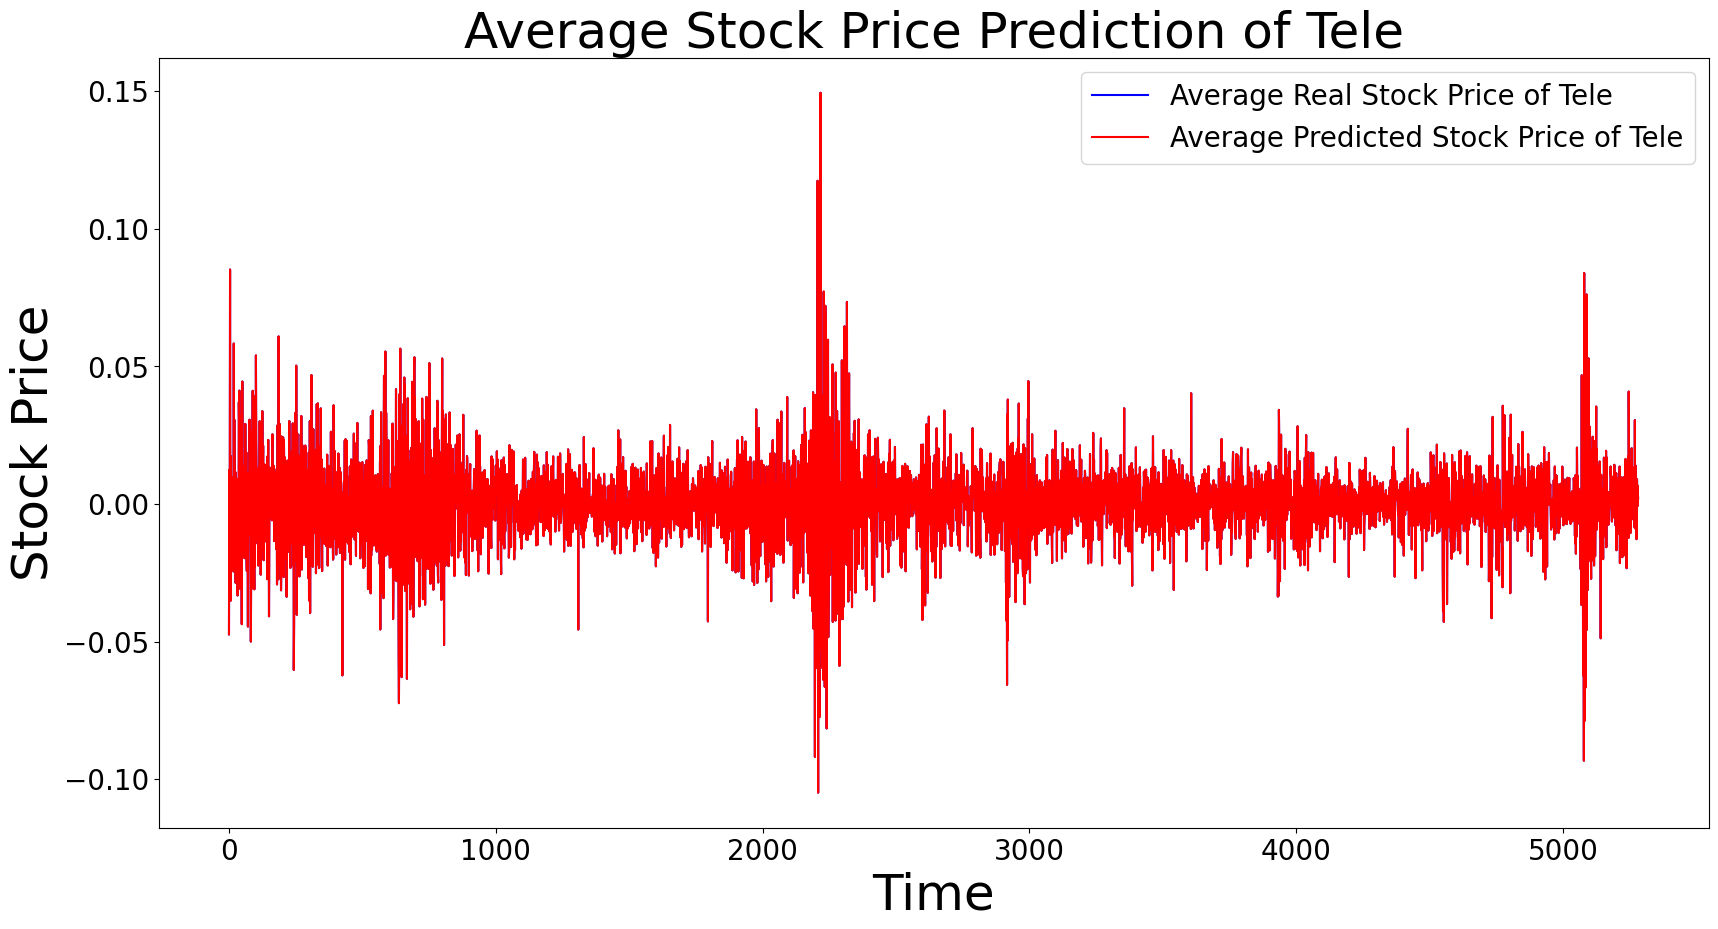

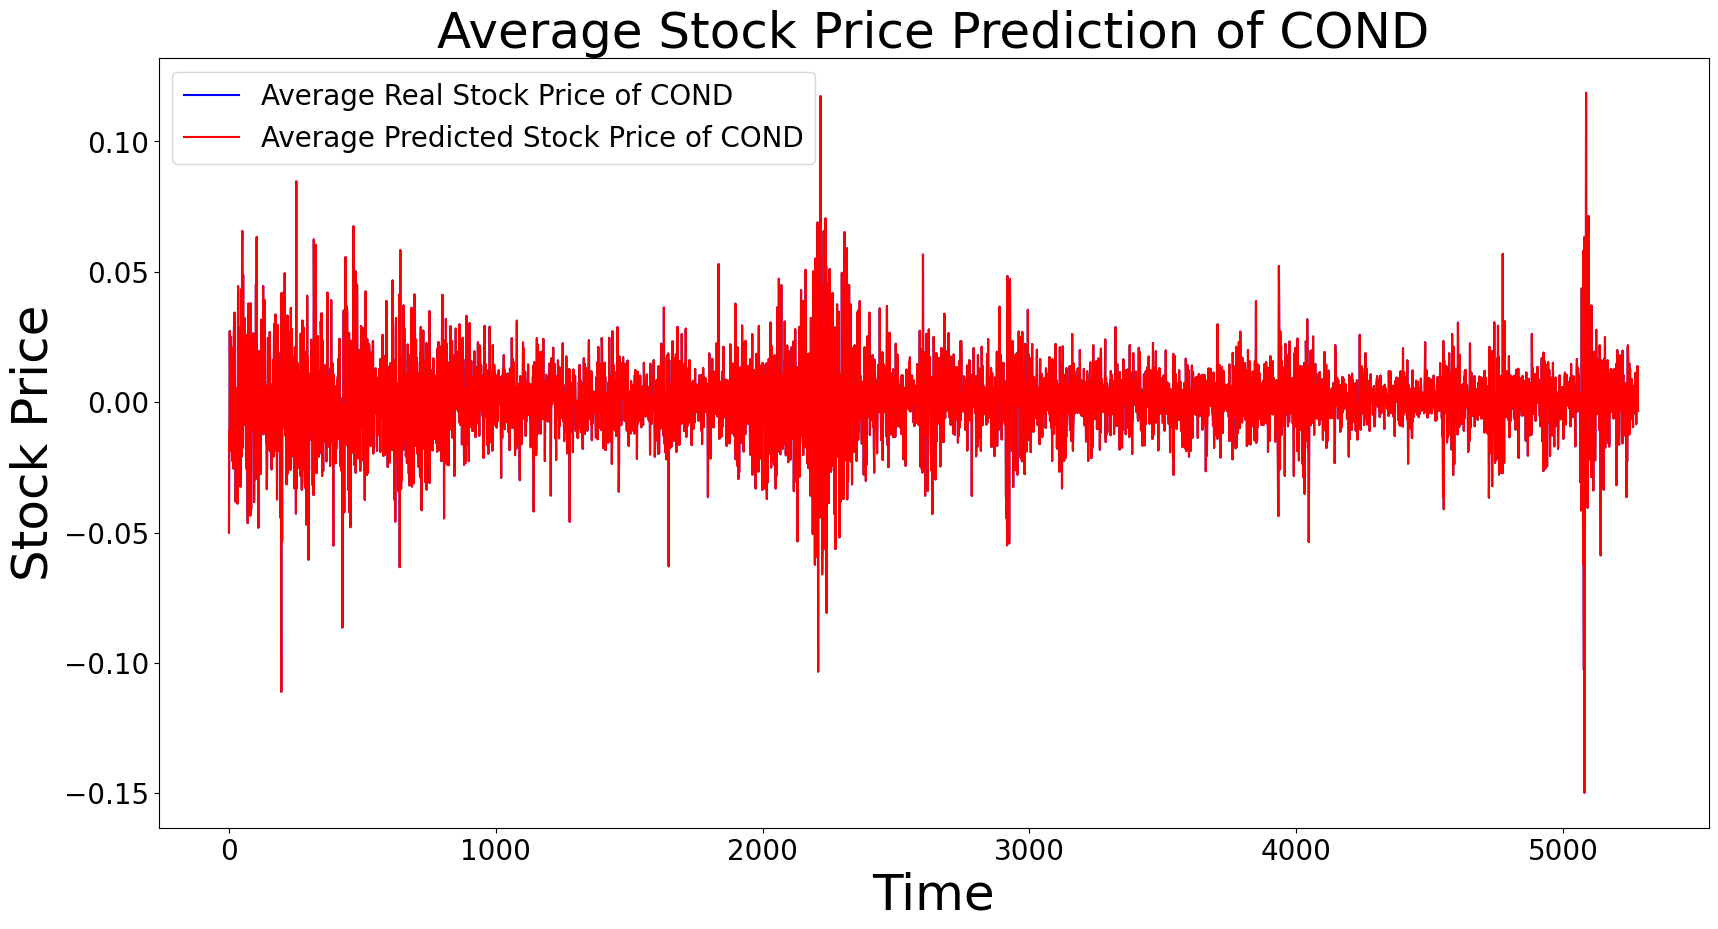

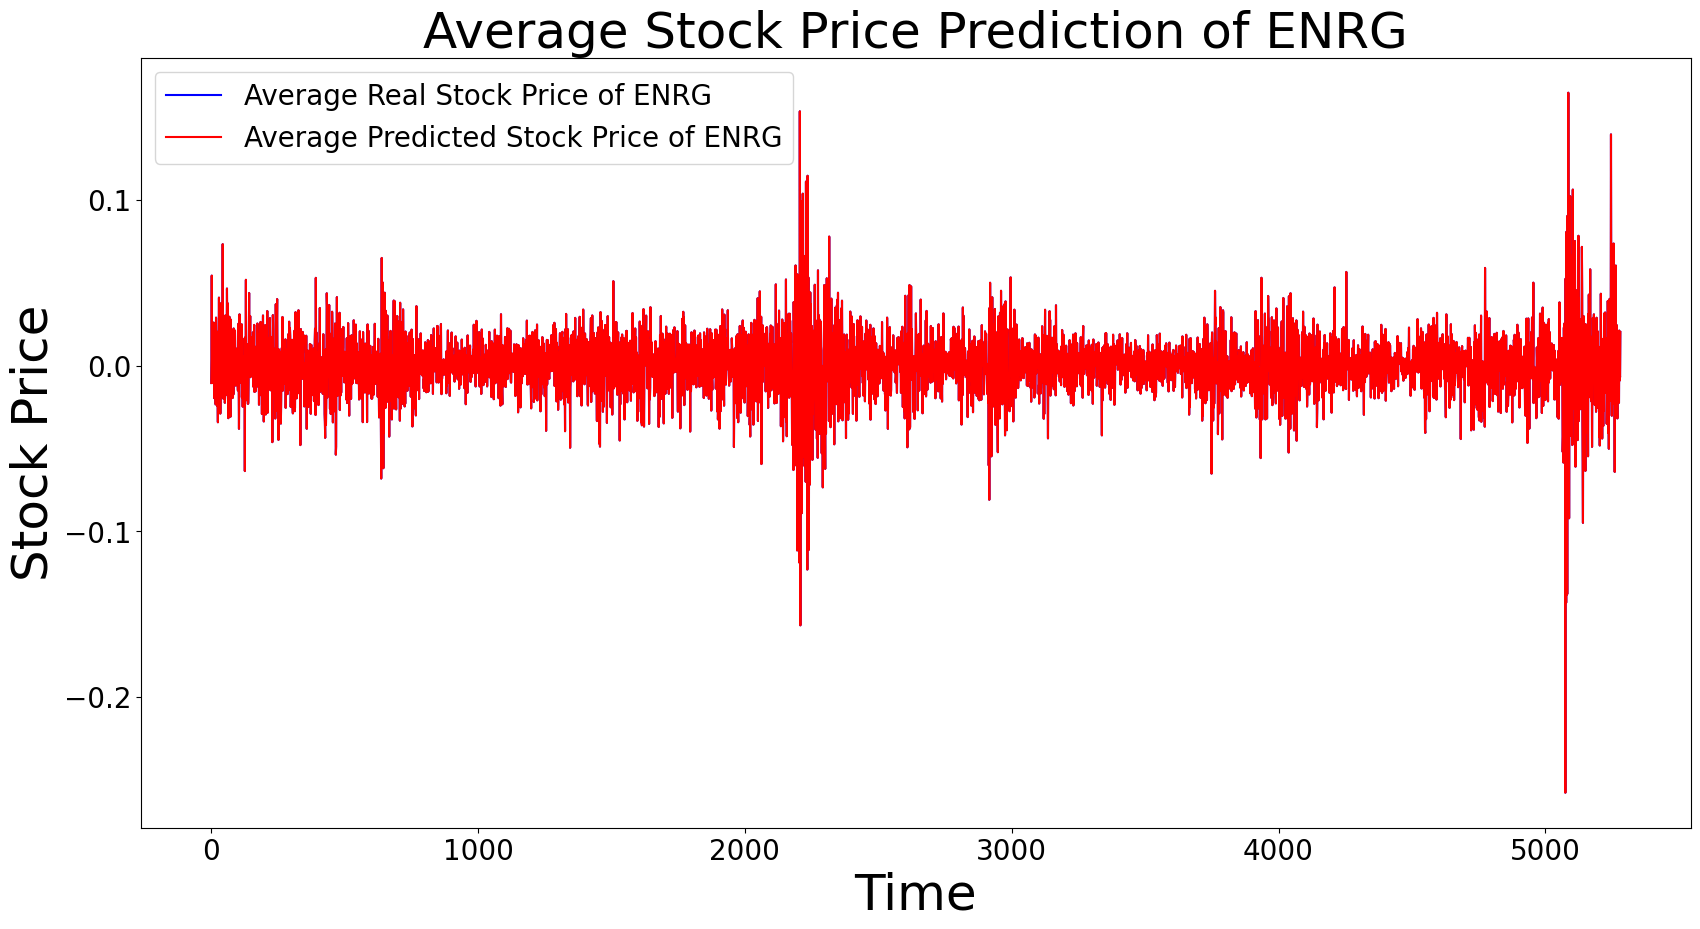

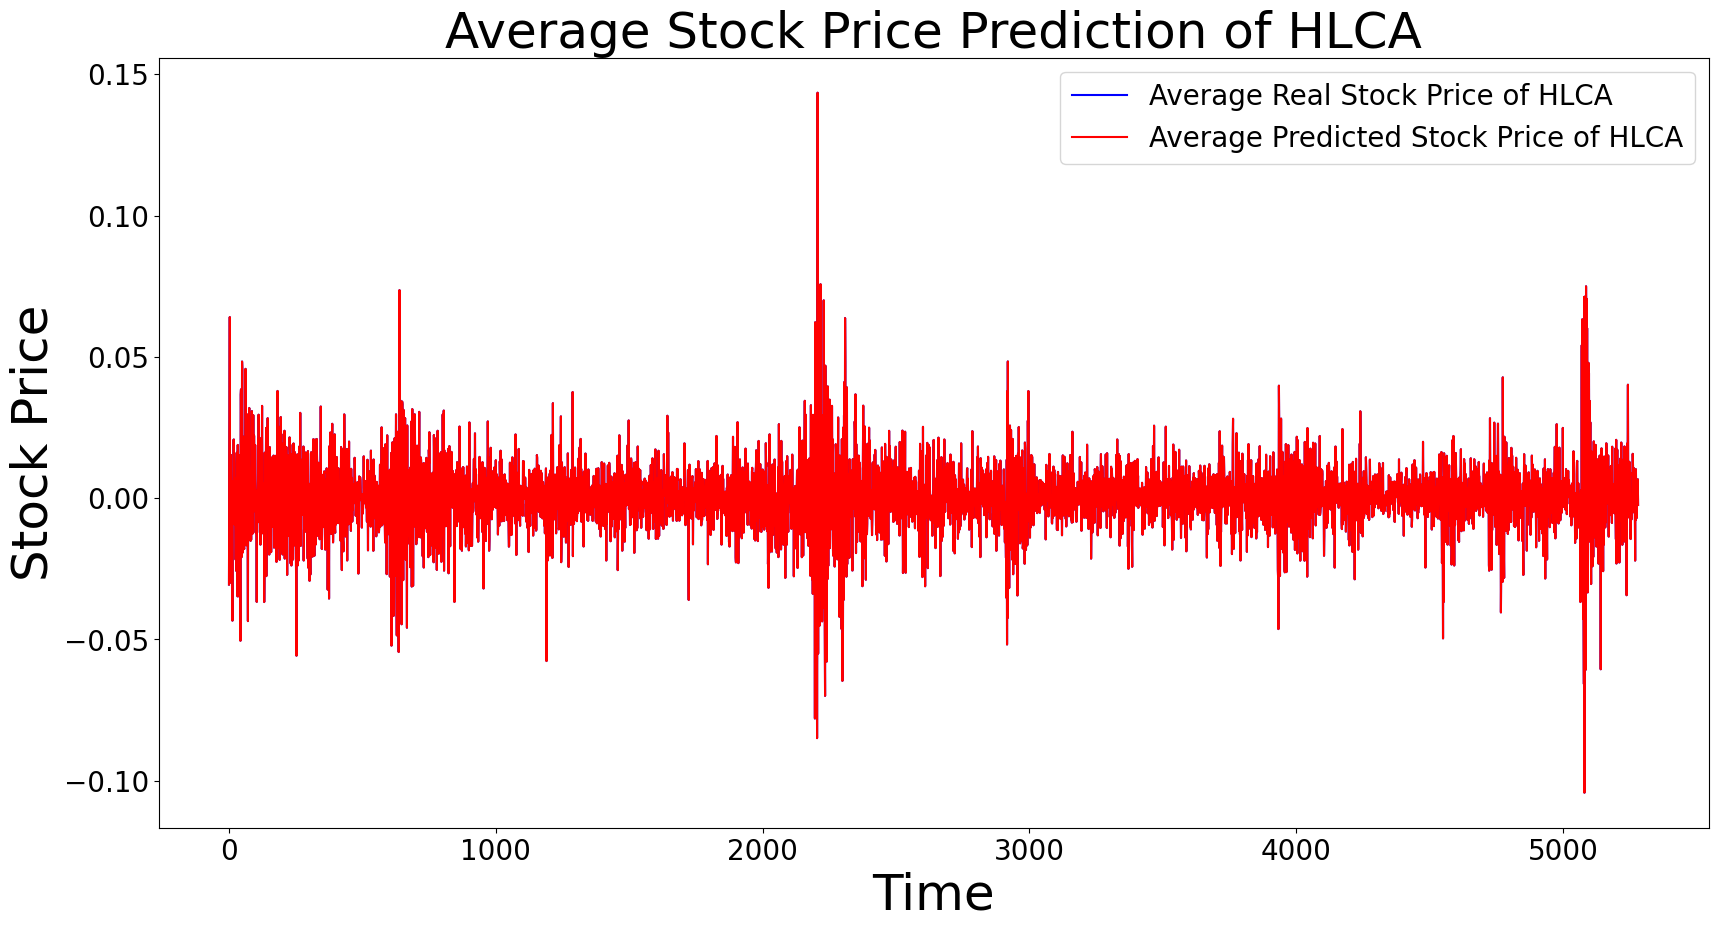

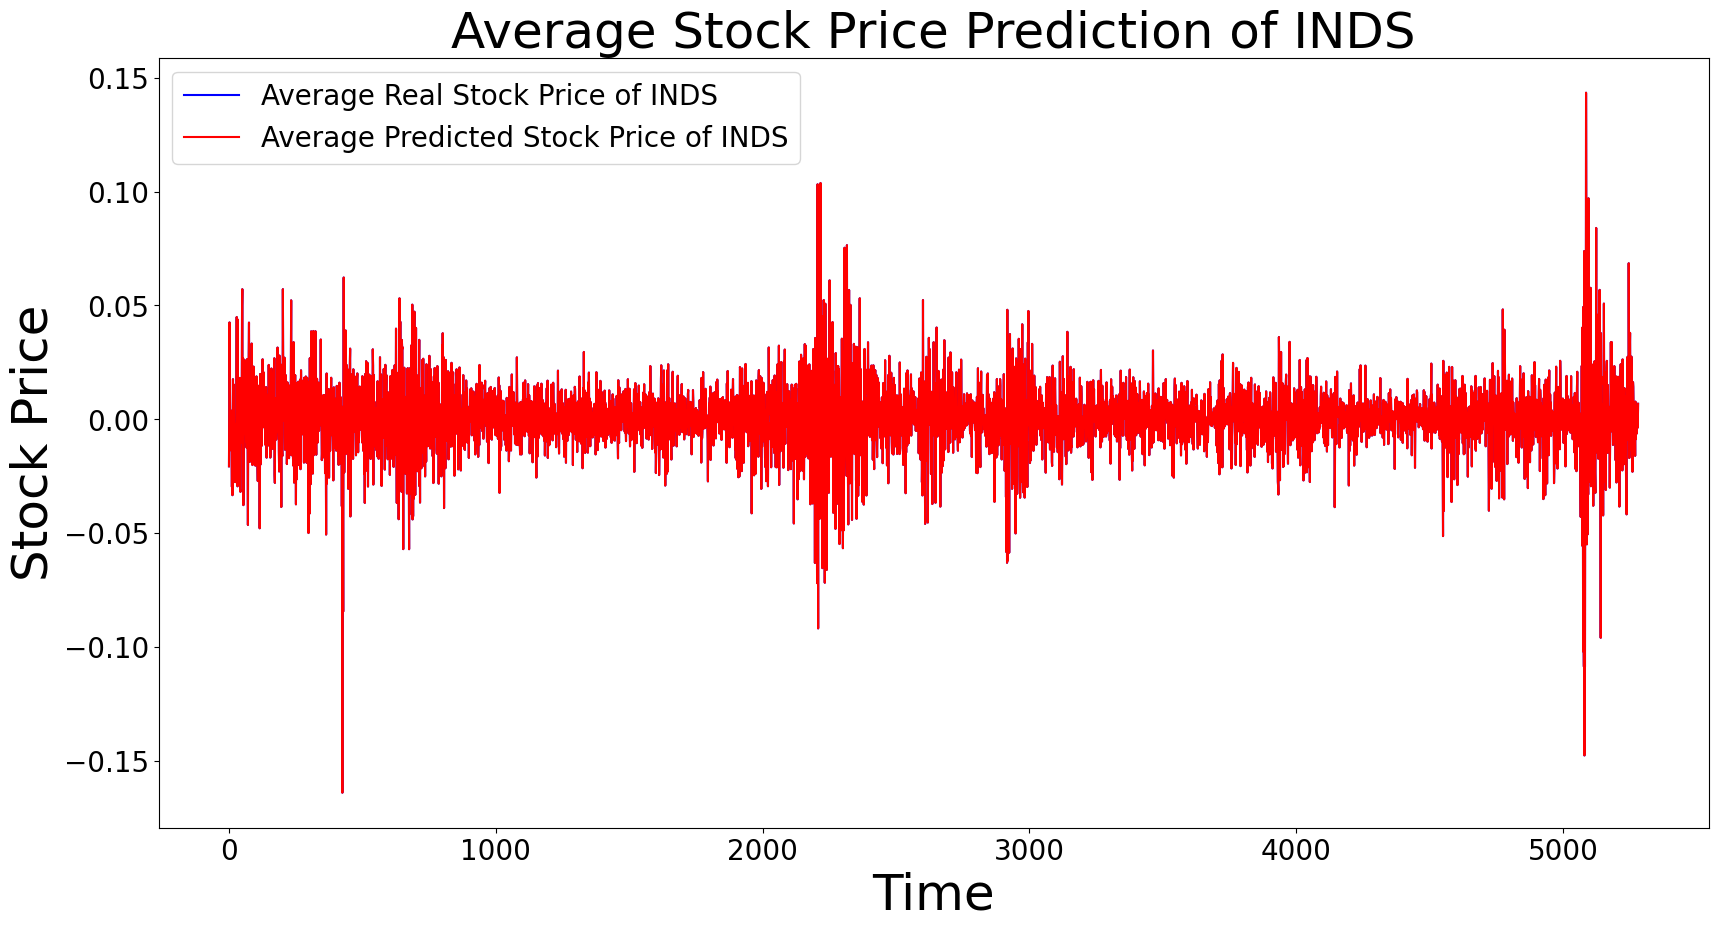

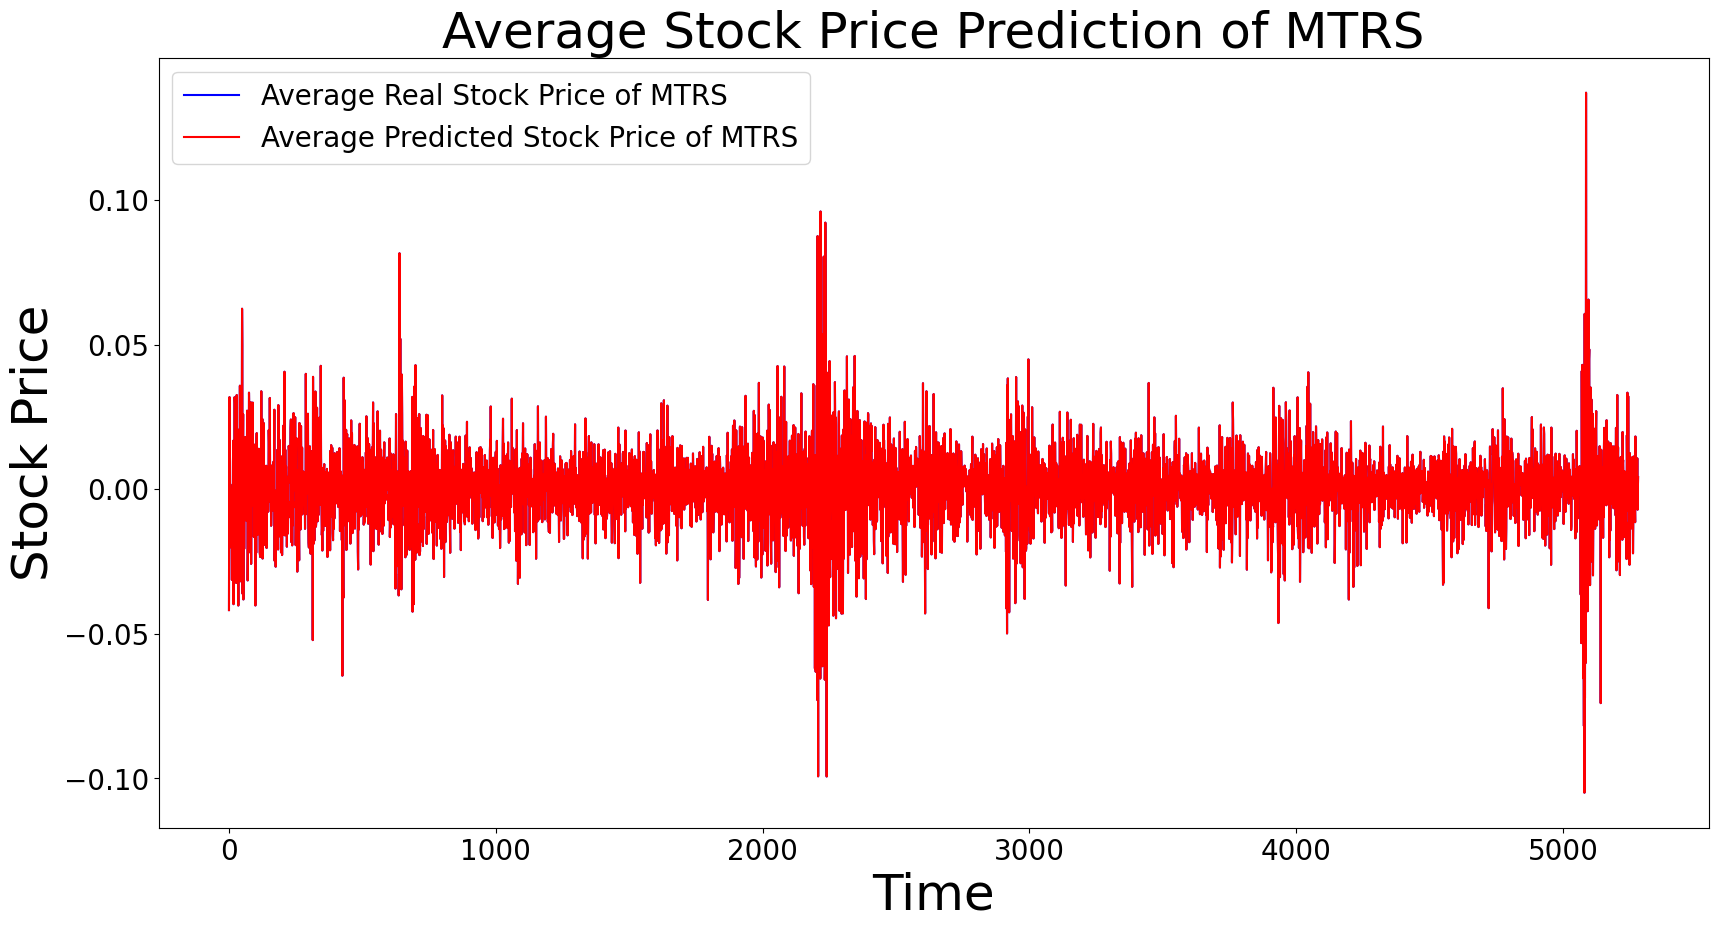

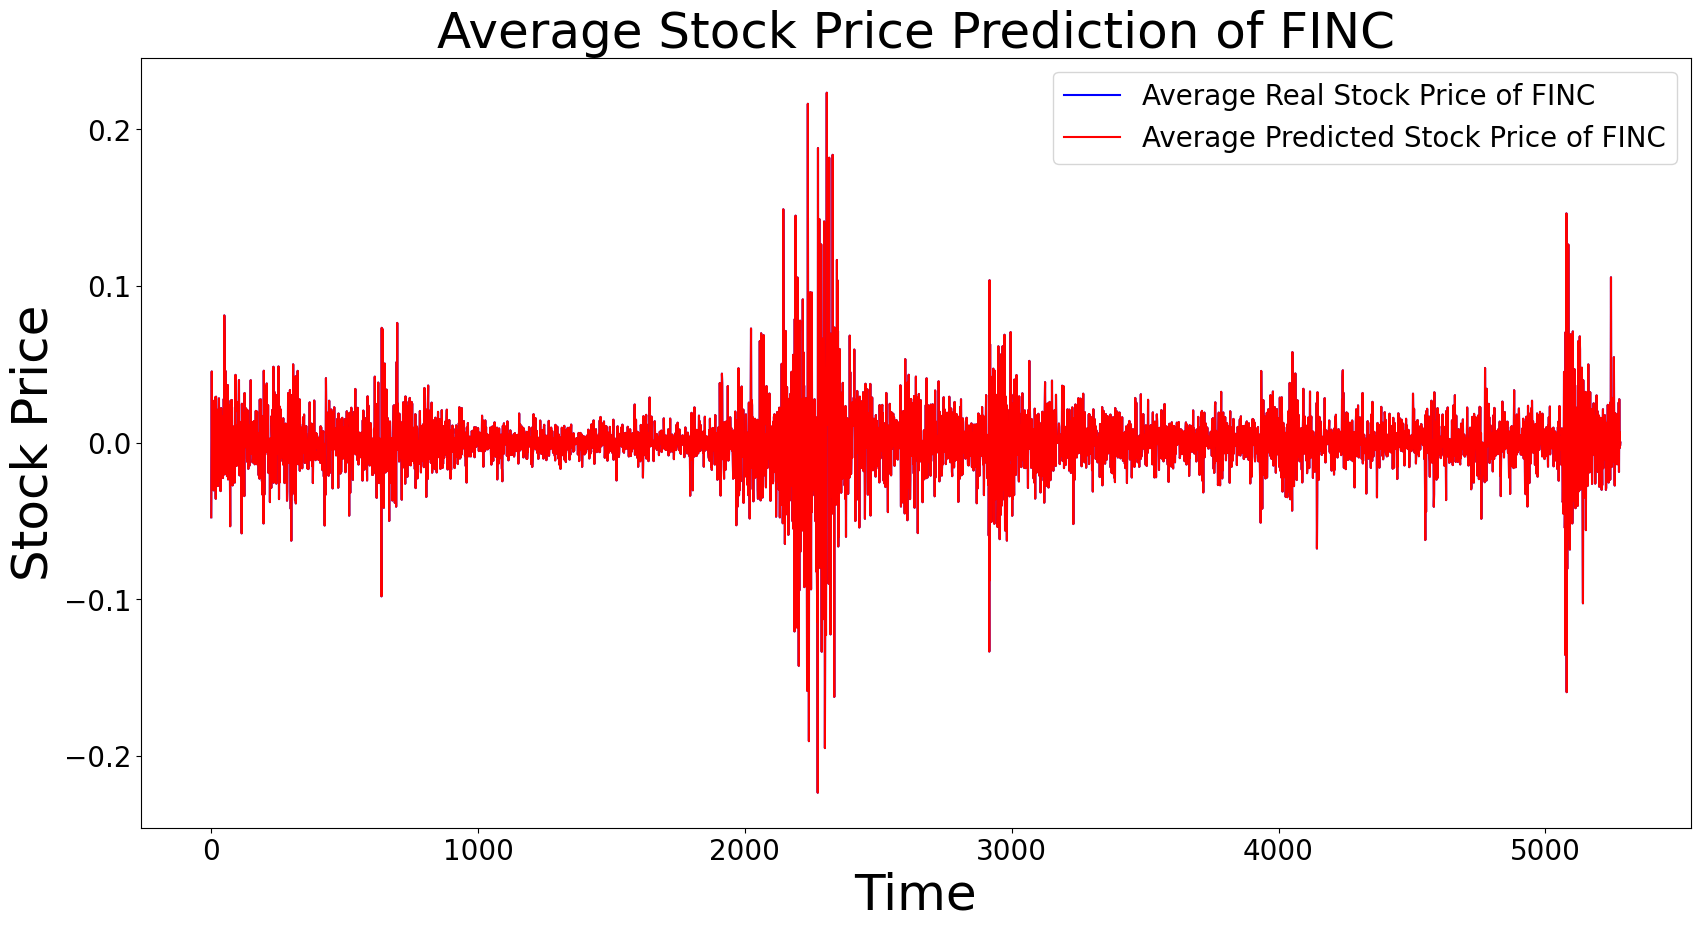

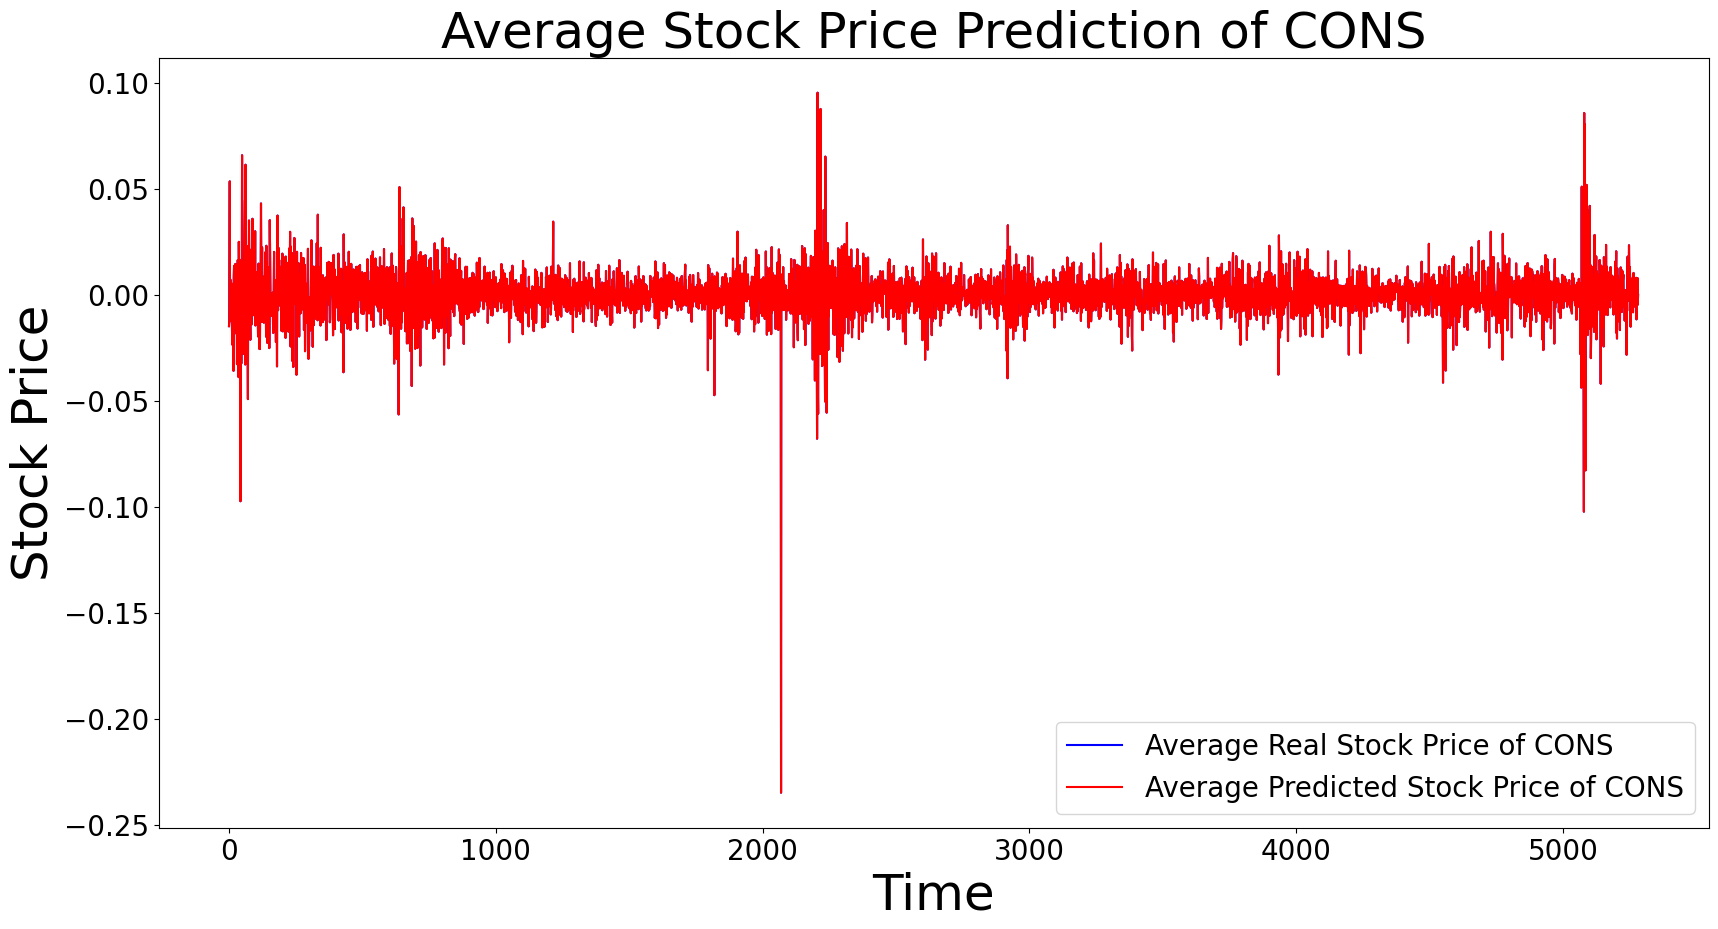

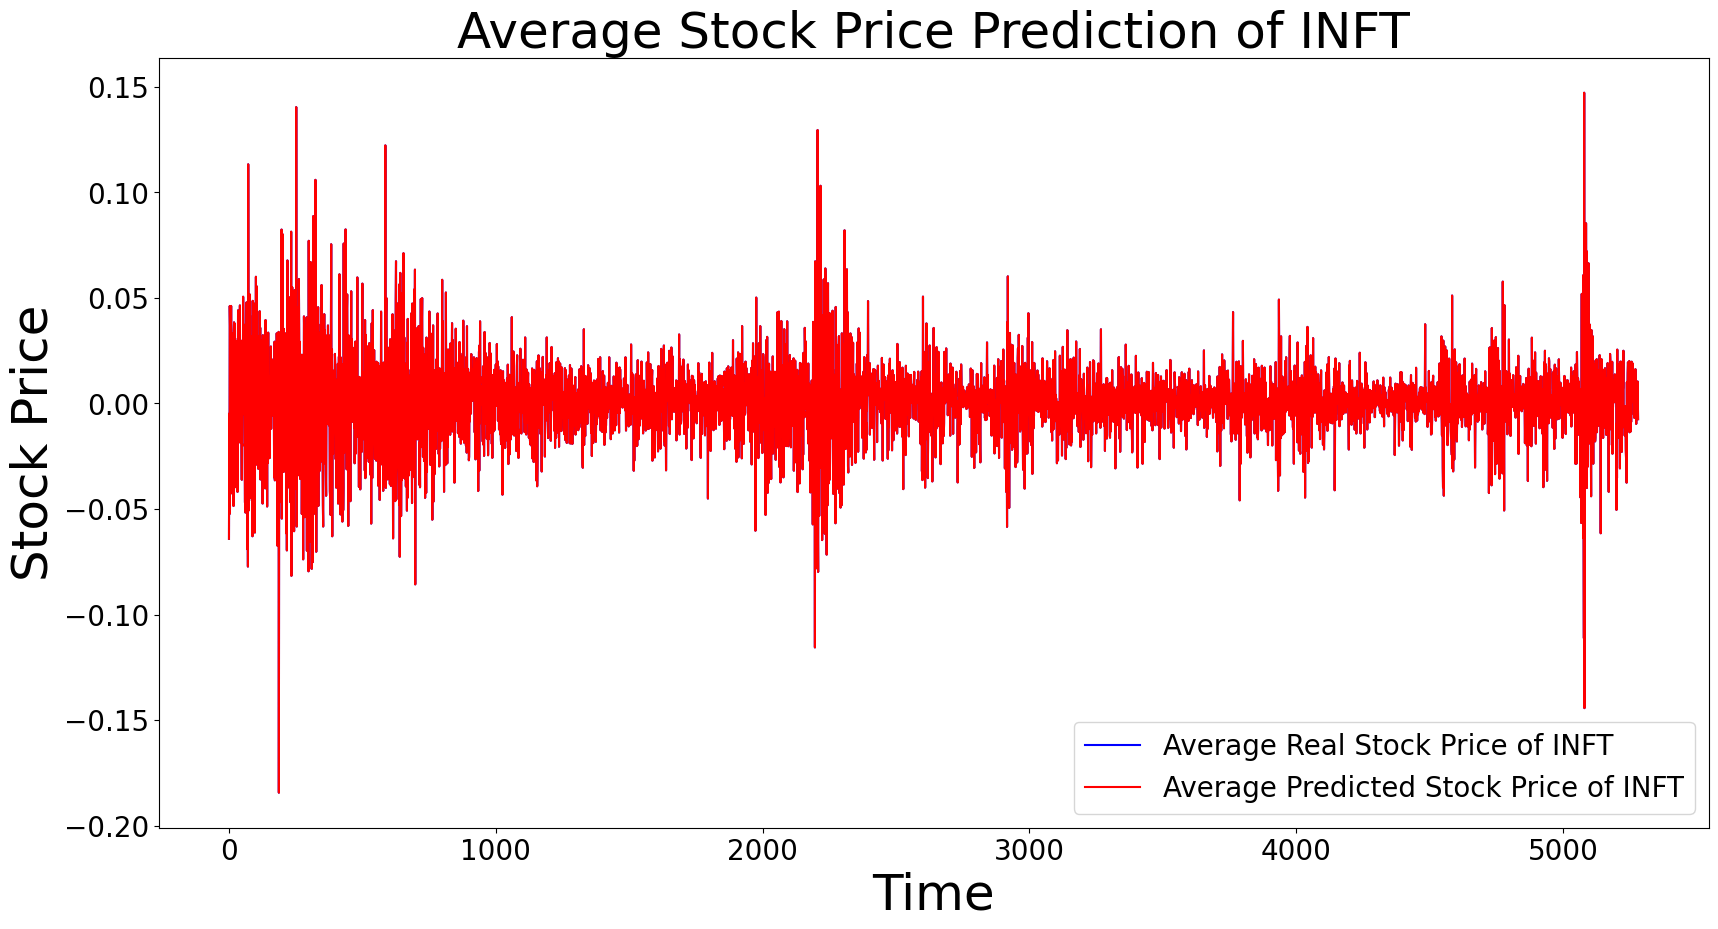

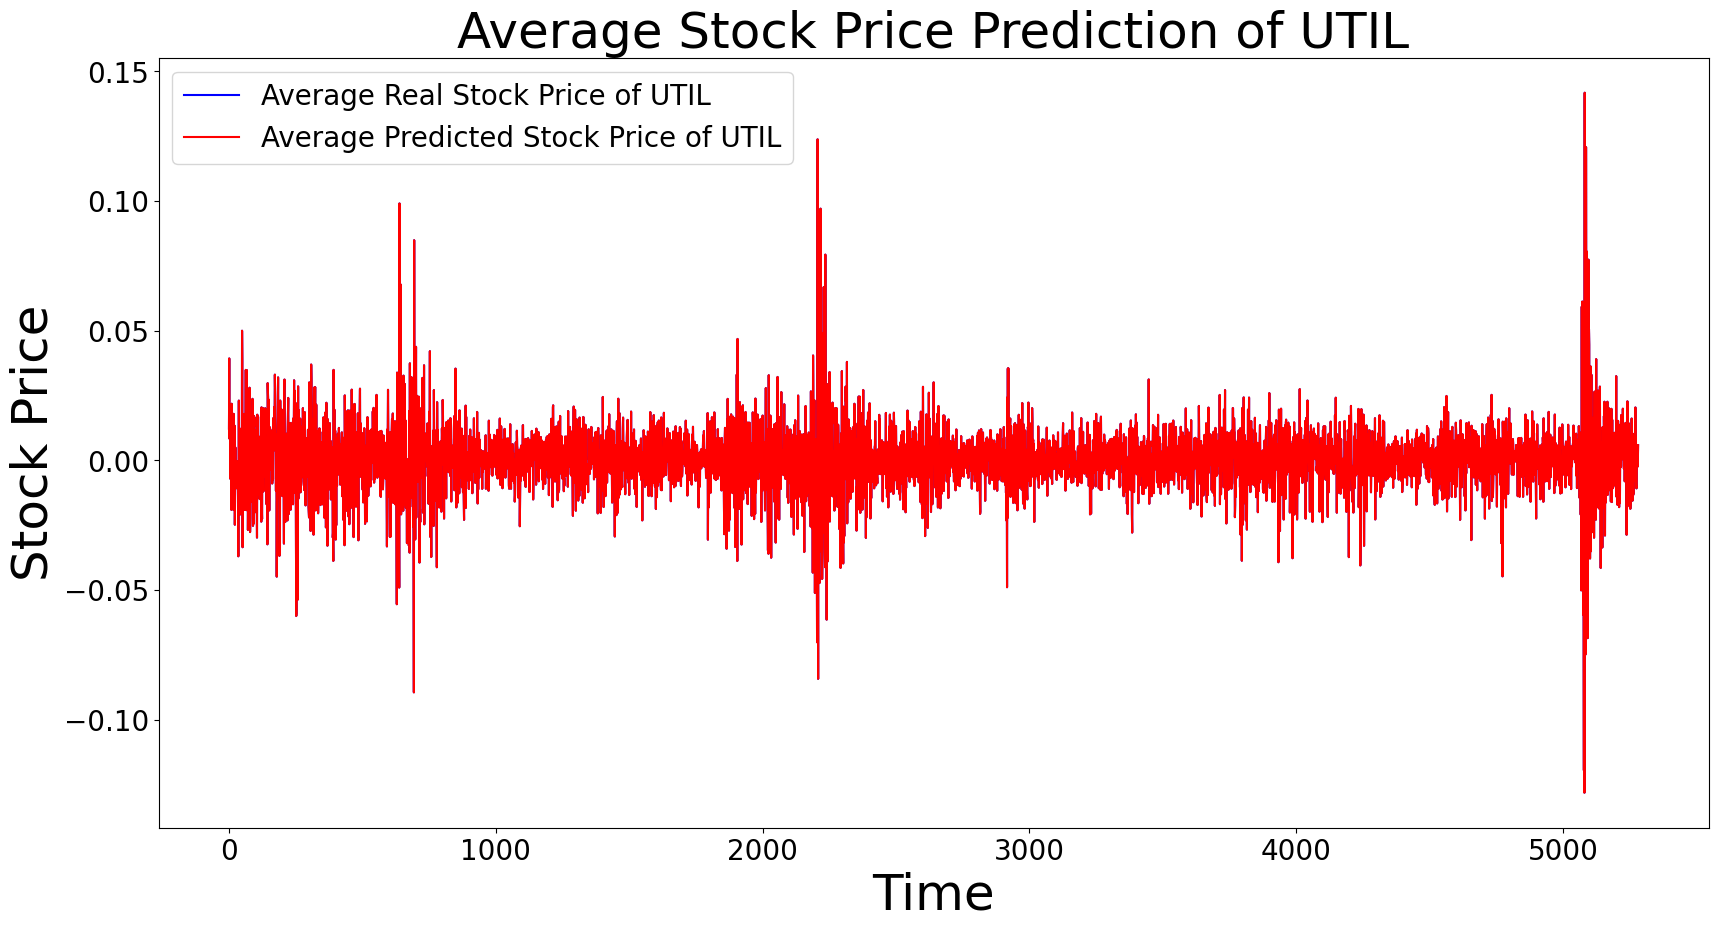

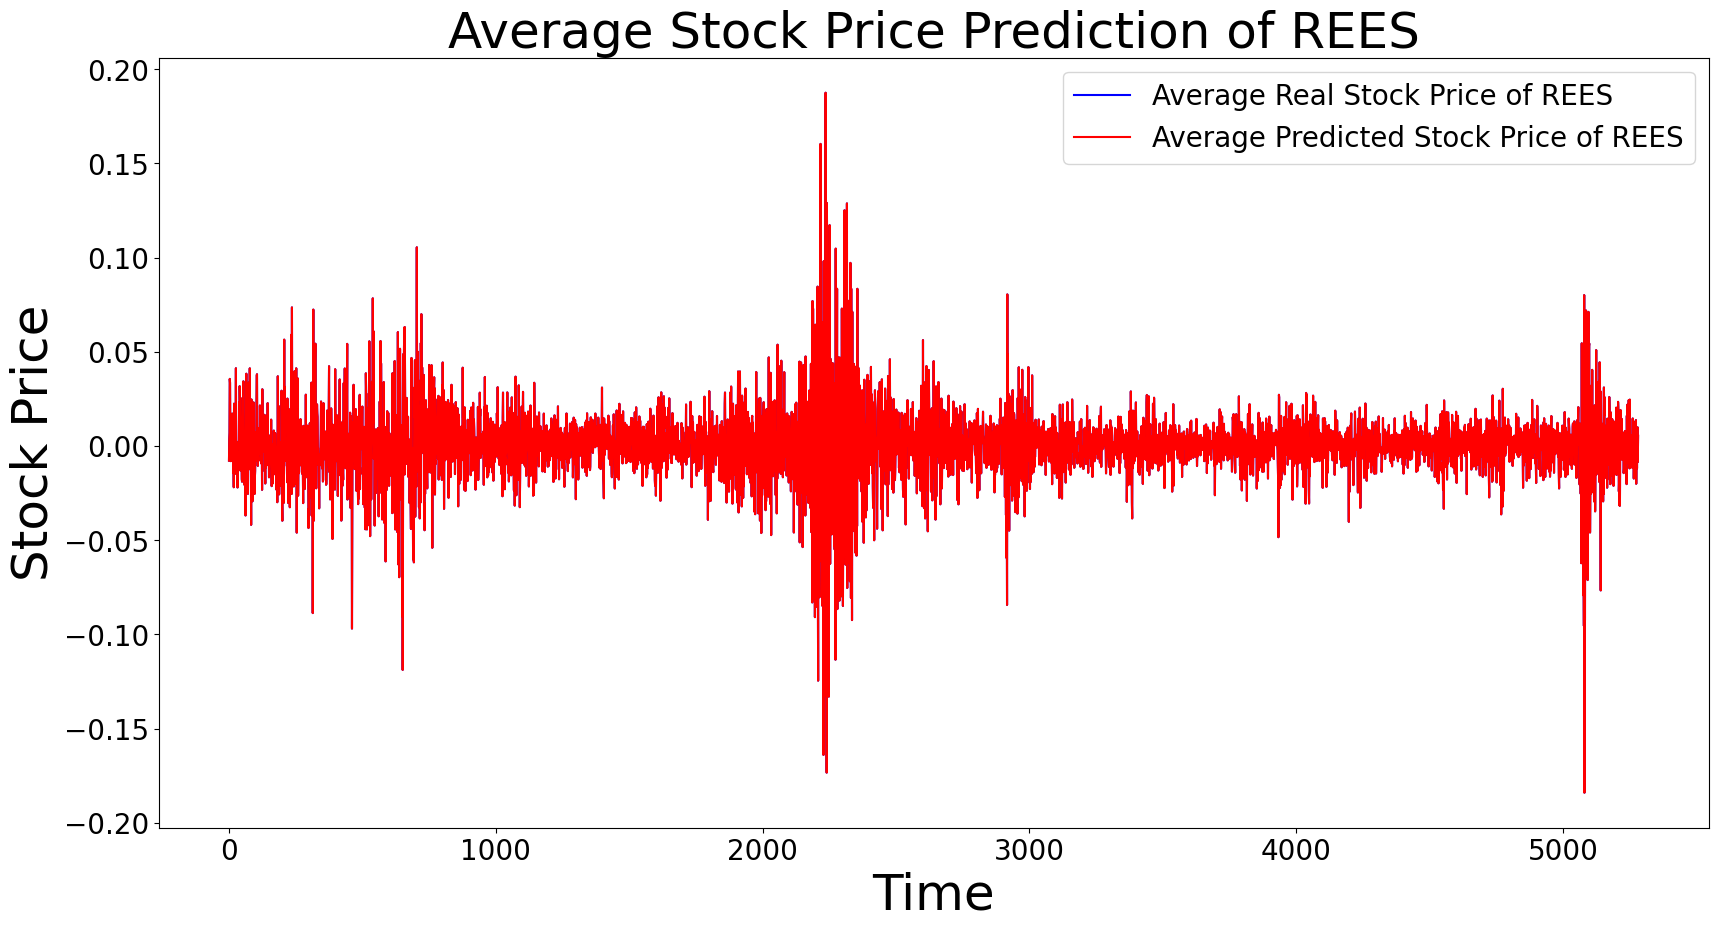

In [23]:
# 각 섹터별 예측값&실제값 그래프 그리기

plt.rcParams['font.size'] = 20

for sector in stocks:
    plt.figure(figsize=(20,10))

    # 실제 데이터 그래프
    avg_test_y = np.mean([df.iloc[:, company_list.index(company)] for company in stocks[sector]], axis=0)
    plt.plot(avg_test_y, color='blue', label='Average Real Stock Price of ' + sector)

    # 예측 데이터 그래프
    avg_pred_y = np.mean([test_data_unscailing.iloc[:, company_list.index(company)] for company in stocks[sector]], axis=0)
    plt.plot(avg_pred_y, color='red', label='Average Predicted Stock Price of ' + sector)

    plt.title('Average Stock Price Prediction of ' + sector, fontsize=36)
    plt.xlabel('Time', fontsize=36)
    plt.ylabel('Stock Price', fontsize=36)
    plt.legend()
    plt.show()


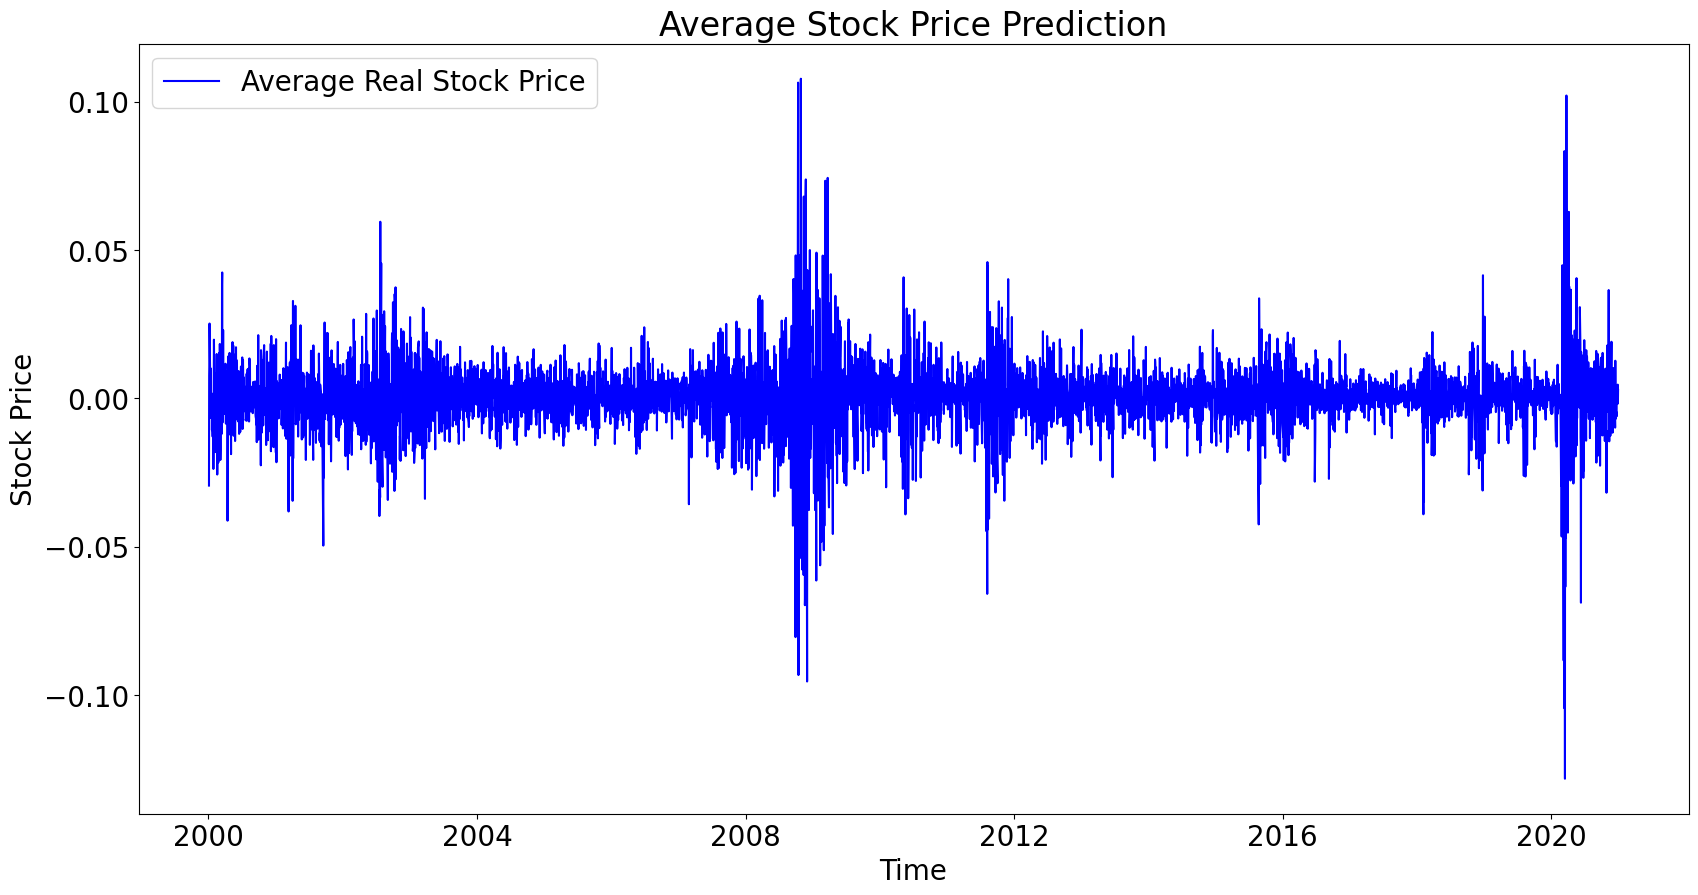

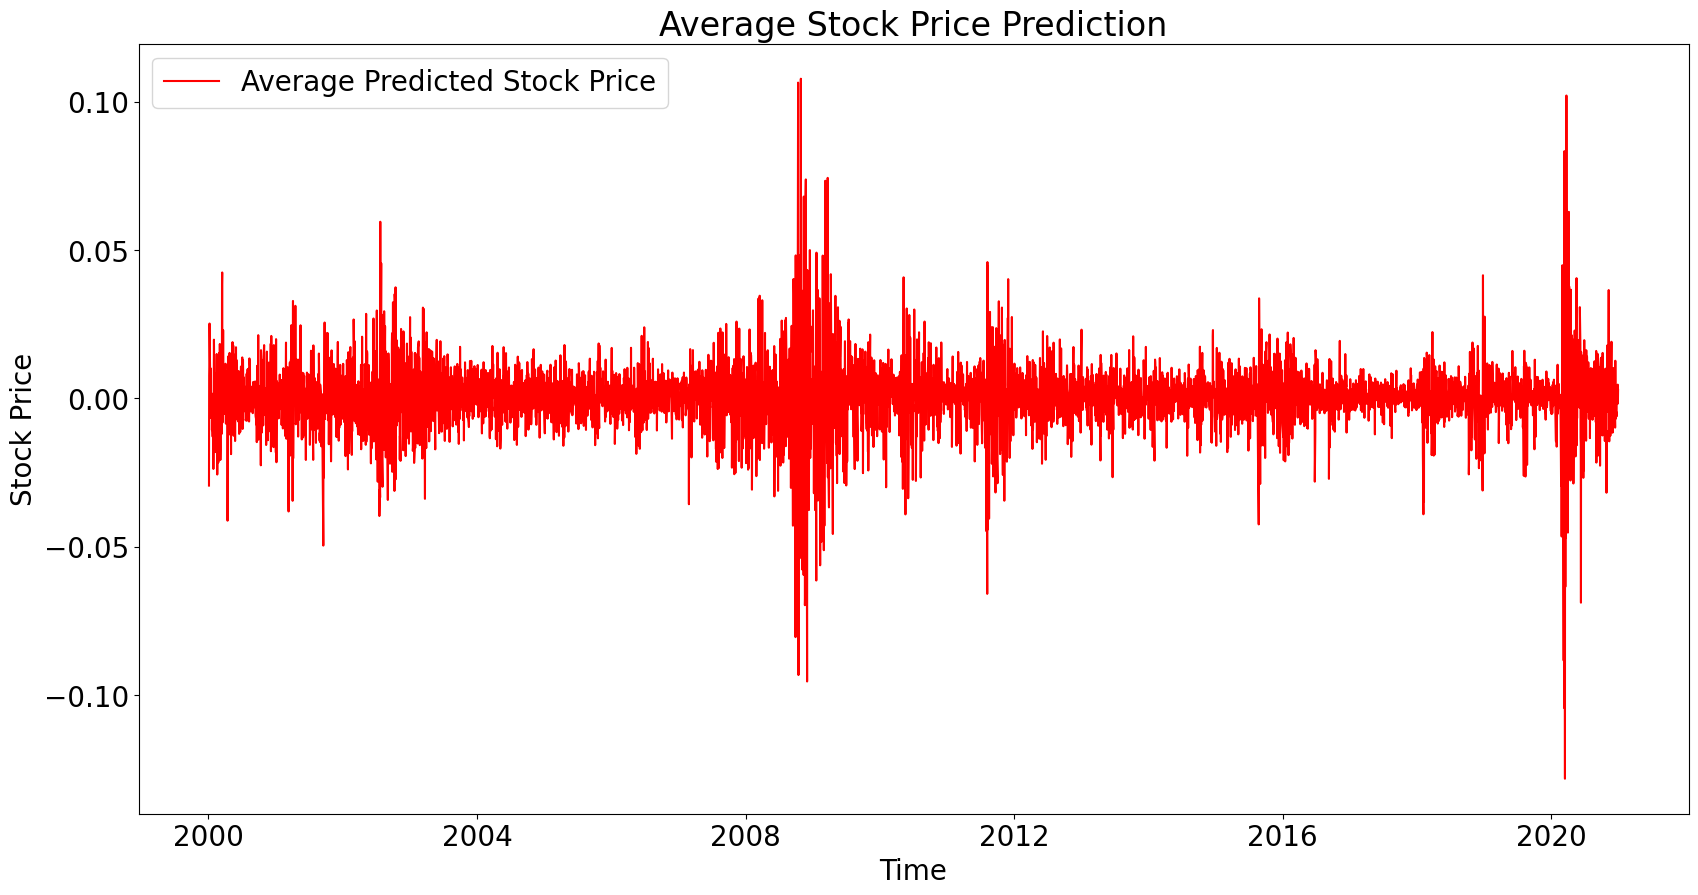

In [28]:
# 모든 주식의 평균 예측값& 실제값 그래프 그리기

plt.rcParams['font.size'] = 20

plt.figure(figsize=(20,10))

# 실제 데이터 그래프
avg_df = np.mean(df, axis=1)
plt.plot(avg_df, color='blue', label='Average Real Stock Price')



plt.title('Average Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()




plt.rcParams['font.size'] = 20

plt.figure(figsize=(20,10))
# 예측 데이터 그래프
avg_unscailing = np.mean(test_data_unscailing, axis=1)
plt.plot(avg_unscailing, color='red', label='Average Predicted Stock Price')

plt.title('Average Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()